# **1. Introducción**
La funcionalidad a implementar en este cuaderno consiste en realizar un reconocimiento de rostro, el cual resulta ser un algoritmo muy complejo pero muy útil para solucionar problemas cotidianos. Como ejemplo, en tiempos de pandemia, una cámara que toma fotos y detecta rostros que pasan por el andén de una estación de tren, le toma la temperatura y devuelve la captura del rostro con su valor correspondiente. Para resolver este algoritmo usamos HAAR Cascade Classifiers. Se trata básicamente de un enfoque basado en el aprendizaje automático en el que una función en cascada se entrena a partir de muchas imágenes tanto positivas como negativas. Según el entrenamiento, se utiliza para detectar los objetos en las otras imágenes.
Entonces, son archivos .xml individuales enormes con una gran cantidad de conjuntos de características y cada xml corresponde a un tipo de caso de uso muy específico. Hay un archivo XML particular que contiene el conjunto de características para detectar el cuerpo completo, parte inferior del cuerpo, los ojos, frontales de la cara, etc.

#**2. Armado del ambiente**
Se toma la dirección de una imagen que se encuentra de manera pública, en este caso, de nuestro repositorio en github.
Luego se obtiene el xml que contiene el código que permite detectar una cara vista de frente provisto por OpenCV en su GitHub oficial. 

In [ ]:
#@title ###**2.1 Parámetros de entrada**
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url = "https://github.com/adrianmorel/SOA-TPN2-Morel-Sanchez/blob/main/HPC/images/trump.jpg?raw=true"#@param {type:"string"}
!wget {url} -O imagen.jpg

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + '/Haardcascades/haarcascade_frontalface_default.xml')
# Our classifier returns the ROI of the detected face as a tuple


--2021-07-09 23:37:36--  https://fersanchez.com.ar/images/trump.jpg?raw=true
Resolving fersanchez.com.ar (fersanchez.com.ar)... 23.111.132.234
Connecting to fersanchez.com.ar (fersanchez.com.ar)|23.111.132.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127952 (125K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 124.95K  --.-KB/s    in 0.1s    

2021-07-09 23:37:36 (997 KB/s) - ‘imagen.jpg’ saved [127952/127952]



# **3. Desarrollo**

Para la resolución, se utiliza la librería OpenCV, la cual es una herramienta muy potente para tratamiento de imágenes, inteligencia artificial entre otros y HAAR Cascade Classifiers, explicado en la introducción. Leemos el fichero xml y utilizamos los métodos para obtener las coordenadas del rostro detectado. Finalmente, añadimos un rectangulo con los resultados obtenidos.




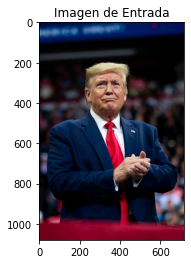

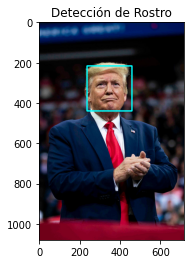

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load our image then convert it to grayscale
image = cv2.imread('imagen.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen de Entrada')
cv2.imwrite('input_image.jpg', image)

plt.show()

# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No se detectaron rostros")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,0), 5)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detección de Rostro')
    cv2.imwrite('face_detection.jpg', image); plt.show()

# **6. Conclusiones**

El uso de librerías especializadas en procesamiento de datos, como en este caso visualización de imágenes, permite entender mejor los datos y tener una mejor comprensión del problema. Además se pueden resolver algoritmos muy complejos con estas herramientas optimizadas para el uso de computación de alto rendimiento con tasas de respuestas eficientes.

# **7. Bibliografía**

[1] Proyectos Open CV del autor (Ajustados por grupo 11 a Python Ver. 3) [GIT](https://github.com/rchavezj/OpenCV_Projects)

[2] Github Oficial de OpenCV (Extracción del XML) [GIT](https://github.com/opencv)

[3] Información sobre Haar Cascade Classifiers [WEB](https://towardsdatascience.com/computer-vision-detecting-objects-using-haar-cascade-classifier-4585472829a9)